# MACHINE LEARNING PREDICTION ON BREAST CANCER PATIENT 'S VITAL STATUS

This project is based on breast cancer patient's vital status. The dataset for this research was gotten from kaggle. Originally containg 2509 rows and 34 columns. 

## LIBRARIES

In [1]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Data importation
import pandas as pd  # For handling dataframes
import numpy as np   # For numerical operations

# Data visualization
import plotly.graph_objects as go   
import matplotlib.pyplot as plt     
import plotly.express as px        
import seaborn as sns  



# Feature selection
from sklearn.feature_selection import mutual_info_classif  # For mutual information feature selection
from sklearn.preprocessing import LabelEncoder              # For label encoding categorical variables

 # For standardization
from sklearn.preprocessing import StandardScaler  

# Import the necessary libraries for model evaluation and metrics
from sklearn.metrics import roc_auc_score   # For ROC-AUC score calculation
from sklearn.model_selection import train_test_split   # For splitting data into train and test sets
from sklearn.metrics import accuracy_score   # For accuracy calculation

# Models
from sklearn.ensemble import RandomForestClassifier   # Random Forest Classifier
from sklearn.tree import DecisionTreeClassifier       # Decision Tree Classifier
from sklearn.linear_model import LogisticRegression  # Logistic Regression Classifier
from sklearn.naive_bayes import GaussianNB           # Gaussian Naive Bayes Classifier



# Other utilities
from sklearn.feature_extraction import DictVectorizer as dv   # For converting dictionaries into feature matrices
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # For label encoding and min-max scaling
from sklearn.model_selection import KFold   # For K-fold cross-validation
from sklearn.model_selection import GridSearchCV   # For grid search hyperparameter tuning
from sklearn.tree import export_text   # For exporting decision tree rules as text
from sklearn.tree import plot_tree
import time

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler

## Data importation

In [3]:
df = pd.read_csv('./breast cancer data.csv') 

## Data visualization

In [4]:
#checkig the data frame head
df.head()

Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
0                 claudin-low     1.0                   Positve  ...   
1                        LumA     1.0                   Positve  ...   
2                        LumB     1.0                   Positve  ...   
3                        LumB     1.0                   Positve  ...   
4                        LumB     1.0                   Positve  ...   

  Overall Survival Status  PR Status Radio Therapy  \
0                  Living   Negative           Yes   
1                  Living   Positive           Yes   
2                Deceased   Positive            No   
3                  Living   Positive           Yes   
4                Deceased   Positive           Yes   

  Relapse Free Status (Months) Relapse Free Status     Sex  \
0                       138.65        Not Recurred  Female   
1                        83.52        Not Recurred  Female   
2                       151.28            Recurred  Female   
3                       162.76        Not Recurred  Female   
4                        18.55            Recurred  Female   

  3-Gene classifier subtype Tumor Size Tumor Stage  Patient Vital Status  
0                 ER-/HER2-       22.0         2.0                Living  
1     ER+/HER2- High Prolif       10.0         1.0                Living  
2                       NaN       15.0         2.0       Died of Disease  
3                       NaN       25.0         2.0                Living  
4     ER+/HER2- High Prolif       40.0         2.0       Died of Disease  

[5 rows x 34 columns]

In [5]:
# checking the amount of rows and columns
df.shape

(2509, 34)

In [6]:
#descriptive statiscics (Sum, Average, Variance, minimum, 1st quartile, 2nd quartile, 3rd quartile
df.describe()

Age at Diagnosis       Cohort  Neoplasm Histologic Grade  \
count       2498.000000  2498.000000                2388.000000   
mean          60.420300     2.900320                   2.412060   
std           13.032997     1.962216                   0.649363   
min           21.930000     1.000000                   1.000000   
25%           50.920000     1.000000                   2.000000   
50%           61.110000     3.000000                   3.000000   
75%           70.000000     4.000000                   3.000000   
max           96.290000     9.000000                   3.000000   

       Lymph nodes examined positive  Mutation Count  \
count                    2243.000000     2357.000000   
mean                        1.950513        5.578702   
std                         4.017774        3.967967   
min                         0.000000        1.000000   
25%                         0.000000        3.000000   
50%                         0.000000        5.000000   
75%                         2.000000        7.000000   
max                        45.000000       80.000000   

       Nottingham prognostic index  Overall Survival (Months)  \
count                  2287.000000                1981.000000   
mean                      4.028787                 125.244271   
std                       1.189092                  76.111772   
min                       1.000000                   0.000000   
25%                       3.048000                  60.866667   
50%                       4.044000                 116.466667   
75%                       5.040000                 185.133333   
max                       7.200000                 355.200000   

       Relapse Free Status (Months)   Tumor Size  Tumor Stage  
count                   2388.000000  2360.000000  1788.000000  
mean                     108.842487    26.220093     1.713647  
std                       76.519494    15.370883     0.655307  
min                        0.000000     1.000000     0.000000  
25%                       40.560000    17.000000     1.000000  
50%                       99.095000    22.410000     2.000000  
75%                      167.640000    30.000000     2.000000  
max                      384.210000   182.000000     4.000000

In [7]:
# To know the data type of each column
df.dtypes

Patient ID                         object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code                      object
Overall Survival (Months)         

# Data cleaning and processing

In [8]:
df.duplicated().sum()

0

In [9]:
#Checking for missing values
df.isna().sum()

Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therap

In [10]:
# Columns having missing values
missing_columns =[col for col in df.columns if df[col].isnull().sum()>0]
missing_columns

['Age at Diagnosis',
 'Type of Breast Surgery',
 'Cellularity',
 'Chemotherapy',
 'Pam50 + Claudin-low subtype',
 'Cohort',
 'ER status measured by IHC',
 'ER Status',
 'Neoplasm Histologic Grade',
 'HER2 status measured by SNP6',
 'HER2 Status',
 'Tumor Other Histologic Subtype',
 'Hormone Therapy',
 'Inferred Menopausal State',
 'Integrative Cluster',
 'Primary Tumor Laterality',
 'Lymph nodes examined positive',
 'Mutation Count',
 'Nottingham prognostic index',
 'Overall Survival (Months)',
 'Overall Survival Status',
 'PR Status',
 'Radio Therapy',
 'Relapse Free Status (Months)',
 'Relapse Free Status',
 '3-Gene classifier subtype',
 'Tumor Size',
 'Tumor Stage',
 'Patient Vital Status']

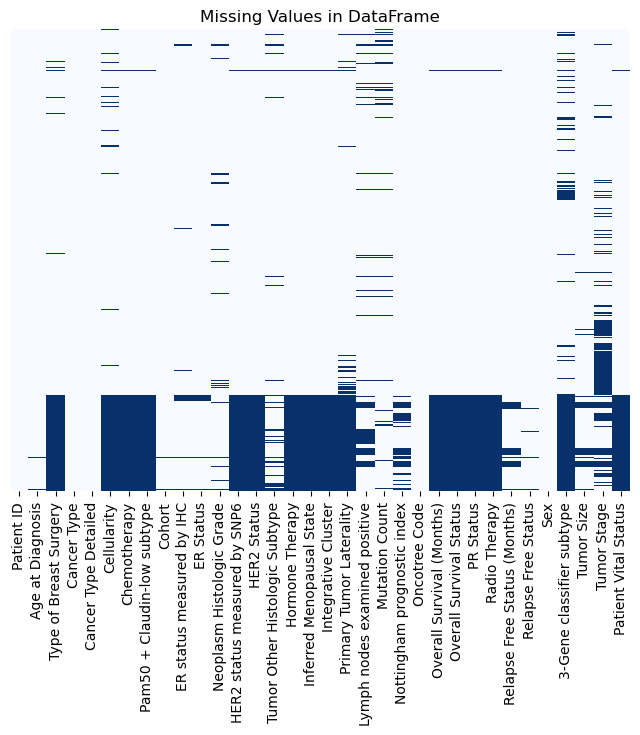

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False)
plt.title('Missing Values in DataFrame')
plt.show()

In [12]:
numerical = df.select_dtypes(include=np.number).columns.tolist()
numerical

['Age at Diagnosis',
 'Cohort',
 'Neoplasm Histologic Grade',
 'Lymph nodes examined positive',
 'Mutation Count',
 'Nottingham prognostic index',
 'Overall Survival (Months)',
 'Relapse Free Status (Months)',
 'Tumor Size',
 'Tumor Stage']

In [13]:
categorical = df.select_dtypes(exclude=np.number).columns.tolist()
categorical

['Patient ID',
 'Type of Breast Surgery',
 'Cancer Type',
 'Cancer Type Detailed',
 'Cellularity',
 'Chemotherapy',
 'Pam50 + Claudin-low subtype',
 'ER status measured by IHC',
 'ER Status',
 'HER2 status measured by SNP6',
 'HER2 Status',
 'Tumor Other Histologic Subtype',
 'Hormone Therapy',
 'Inferred Menopausal State',
 'Integrative Cluster',
 'Primary Tumor Laterality',
 'Oncotree Code',
 'Overall Survival Status',
 'PR Status',
 'Radio Therapy',
 'Relapse Free Status',
 'Sex',
 '3-Gene classifier subtype',
 'Patient Vital Status']

In [14]:
# Separate numerical and categorical columns
from sklearn.impute import SimpleImputer
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Impute missing values for numerical columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Impute missing values for categorical columns with mode (most frequent value)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [15]:
df.isna().sum()

Patient ID                        0
Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type                       0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER status measured by IHC         0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 status measured by SNP6      0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Primary Tumor Laterality          0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival (Months)         0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)

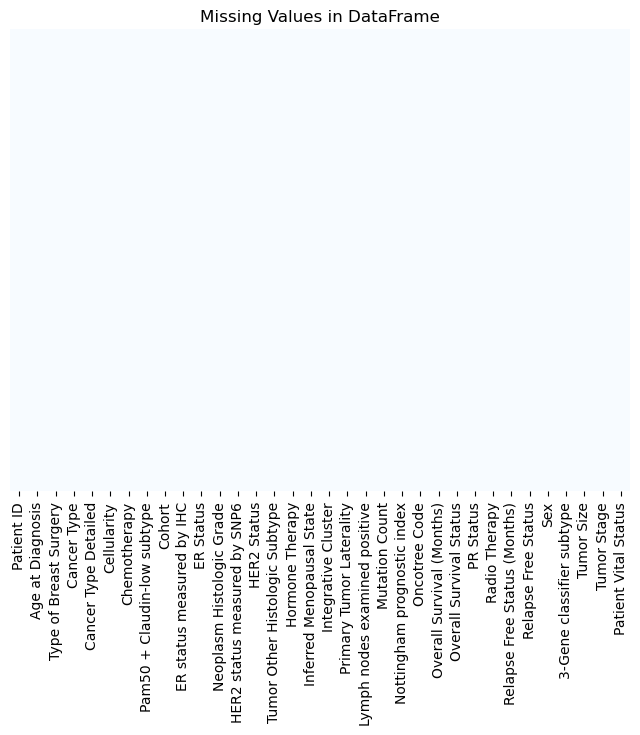

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='Blues', cbar=False, yticklabels=False)
plt.title('Missing Values in DataFrame')
plt.show()

In [17]:
# Check for duplicates
duplicates = df[df.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicate rows:")
    print(duplicates)

No duplicates found.


In [18]:
df.shape

(2509, 34)

## EXPLORATORY DATA ANALYSIS 

Further analysis will be done to futher understand the data characteristic and patterns 

In [19]:
from scipy import stats

# Assuming df is your DataFrame
# Specify the numerical columns to check for outliers
numerical_columns = ['Age at Diagnosis', 'Nottingham prognostic index', 'Overall Survival (Months)']

# Filter the DataFrame to include only the specified numerical columns
df_numerical = df[numerical_columns]

# Method 1: Checking outliers using z-score
z_threshold = 3  # Set the z-score threshold for outlier detection

# Calculate z-scores for each numerical column
z_scores = np.abs(stats.zscore(df_numerical))

# Find indices of outliers based on z-scores exceeding the threshold
outlier_indices = np.where(z_scores > z_threshold)

# Create a DataFrame to display outliers with feature names
outliers_df = pd.DataFrame({
    'Feature': df_numerical.columns[outlier_indices[1]],
    'Outlier Value': df_numerical.values[outlier_indices]
})

print("Outliers Detected using z-score:")
print(outliers_df)

# Method 2: Checking outliers using interquartile range (IQR)
Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)
IQR = Q3 - Q1

# Determine outlier indices based on IQR
outlier_indices_iqr = np.where((df_numerical < (Q1 - 1.5 * IQR)) | (df_numerical > (Q3 + 1.5 * IQR)))

# Create a DataFrame to display outliers with feature names (IQR method)
outliers_df_iqr = pd.DataFrame({
    'Feature': df_numerical.columns[outlier_indices_iqr[1]],
    'Outlier Value': df_numerical.values[outlier_indices_iqr]
})

print("\nOutliers Detected using IQR:")
print(outliers_df_iqr)


Outliers Detected using z-score:
                     Feature  Outlier Value
0  Overall Survival (Months)     337.033333
1  Overall Survival (Months)     351.000000
2  Overall Survival (Months)     355.200000
3  Overall Survival (Months)     330.366667
4  Overall Survival (Months)     335.733333
5  Overall Survival (Months)     335.600000

Outliers Detected using IQR:
                      Feature  Outlier Value
0   Overall Survival (Months)     337.033333
1            Age at Diagnosis      21.930000
2   Overall Survival (Months)     298.033333
3   Overall Survival (Months)     351.000000
4   Overall Survival (Months)     355.200000
5   Overall Survival (Months)     330.366667
6   Overall Survival (Months)     335.733333
7   Overall Survival (Months)     335.600000
8   Overall Survival (Months)     300.700000
9   Overall Survival (Months)     307.933333
10  Overall Survival (Months)     307.633333
11  Overall Survival (Months)     296.866667
12  Overall Survival (Months)     322.833333

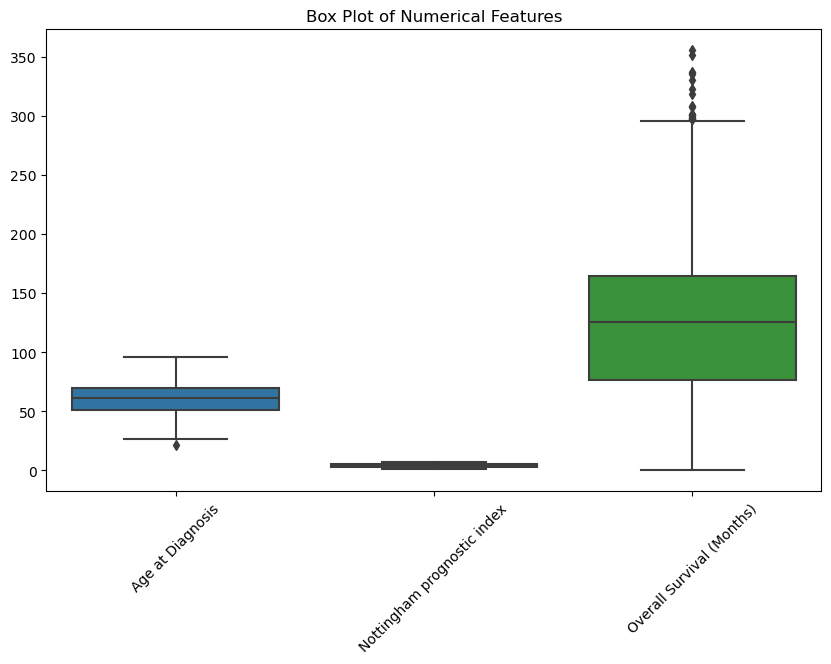

In [20]:
# Assuming df_numerical contains the relevant numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_numerical)
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

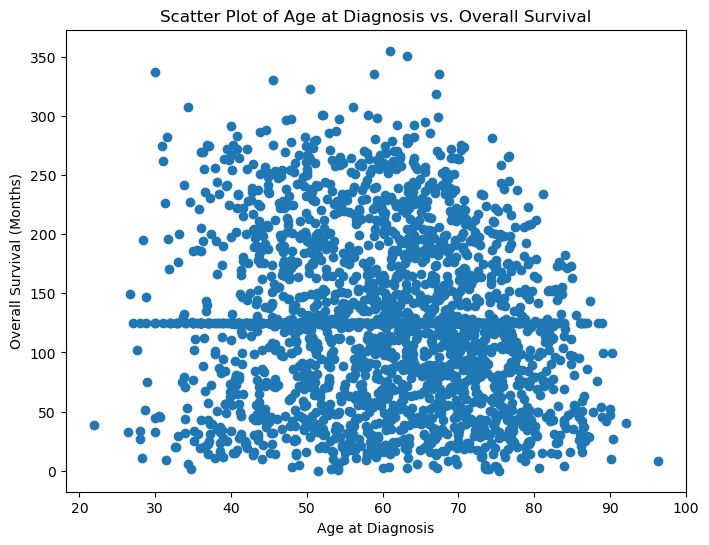

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(df_numerical['Age at Diagnosis'], df_numerical['Overall Survival (Months)'])
plt.title('Scatter Plot of Age at Diagnosis vs. Overall Survival')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Overall Survival (Months)')
plt.show()

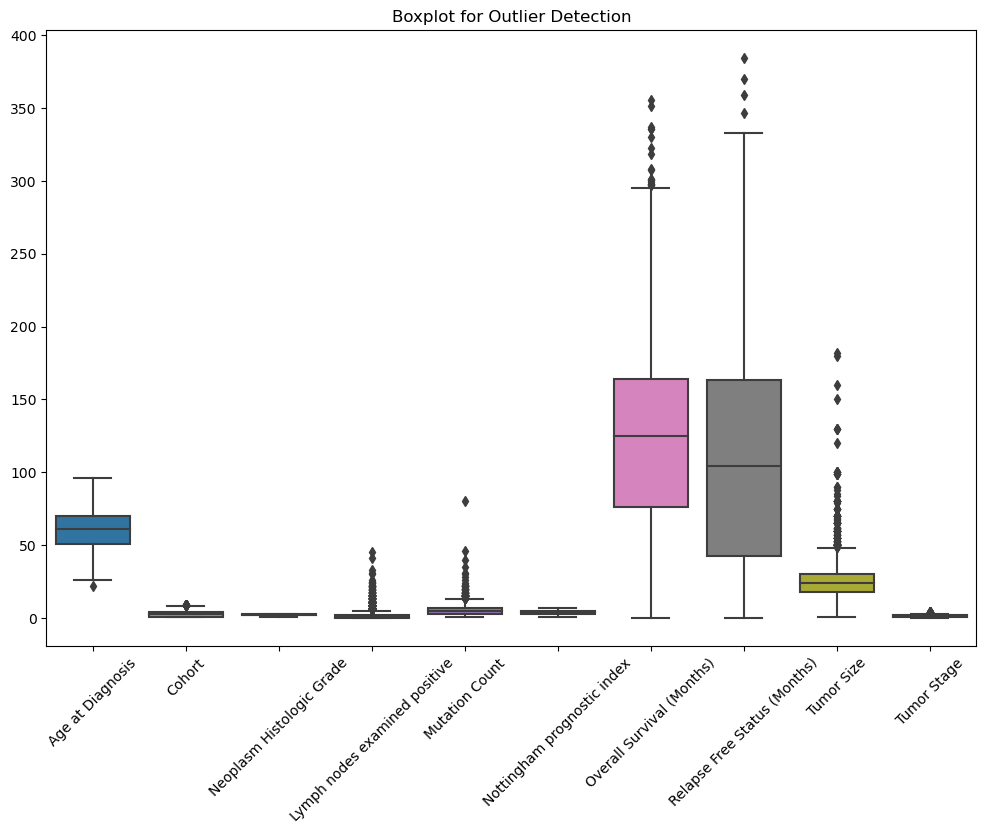

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [23]:
print(df.columns)


Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient Vital Status'],
      dtype='object')


In [24]:
#Checking hte numbe rof categorical columns in the dataset
cat = df.select_dtypes(include='object').columns
len(cat)

24

In [25]:
#Checking for the unique values in the numerical column
for i in cat:
    print("The no.of unique values in",i,"are: ",df.loc[:,i].nunique())

The no.of unique values in Patient ID are:  2509
The no.of unique values in Type of Breast Surgery are:  2
The no.of unique values in Cancer Type are:  2
The no.of unique values in Cancer Type Detailed are:  8
The no.of unique values in Cellularity are:  3
The no.of unique values in Chemotherapy are:  2
The no.of unique values in Pam50 + Claudin-low subtype are:  7
The no.of unique values in ER status measured by IHC are:  2
The no.of unique values in ER Status are:  2
The no.of unique values in HER2 status measured by SNP6 are:  4
The no.of unique values in HER2 Status are:  2
The no.of unique values in Tumor Other Histologic Subtype are:  8
The no.of unique values in Hormone Therapy are:  2
The no.of unique values in Inferred Menopausal State are:  2
The no.of unique values in Integrative Cluster are:  11
The no.of unique values in Primary Tumor Laterality are:  2
The no.of unique values in Oncotree Code are:  8
The no.of unique values in Overall Survival Status are:  2
The no.of uni

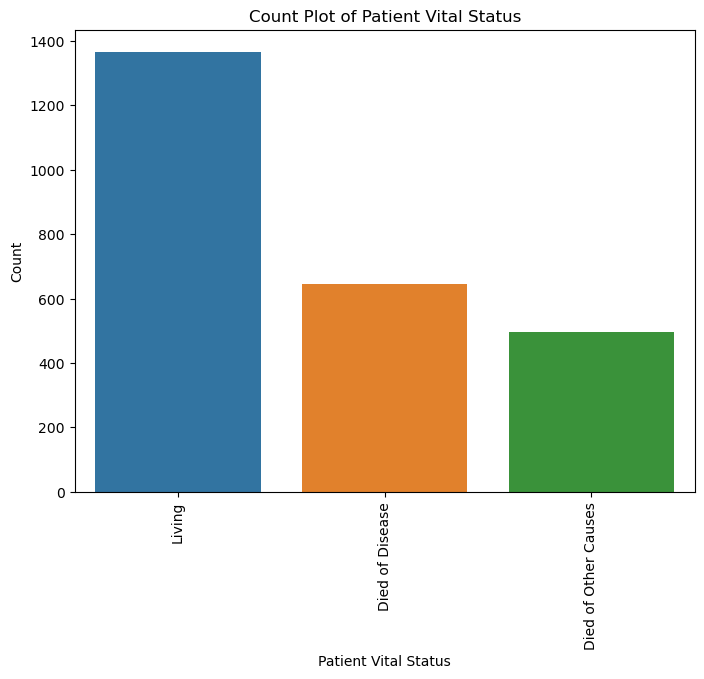

In [26]:
target_variable = 'Patient Vital Status'

# Plot a count plot for the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=df)
plt.title(f'Count Plot of {target_variable}')
plt.xlabel(target_variable)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [27]:
#visualizing categorical column
num = df.select_dtypes(include=np.number).columns
len (num)

10

The number of unique values in Age at Diagnosis are: 1844
The number of unique values in Cohort are: 10
The number of unique values in Neoplasm Histologic Grade are: 4
The number of unique values in Lymph nodes examined positive are: 33
The number of unique values in Mutation Count are: 33
The number of unique values in Nottingham prognostic index are: 437
The number of unique values in Overall Survival (Months) are: 1744
The number of unique values in Relapse Free Status (Months) are: 1973
The number of unique values in Tumor Size are: 139
The number of unique values in Tumor Stage are: 6


<Figure size 2000x1500 with 0 Axes>

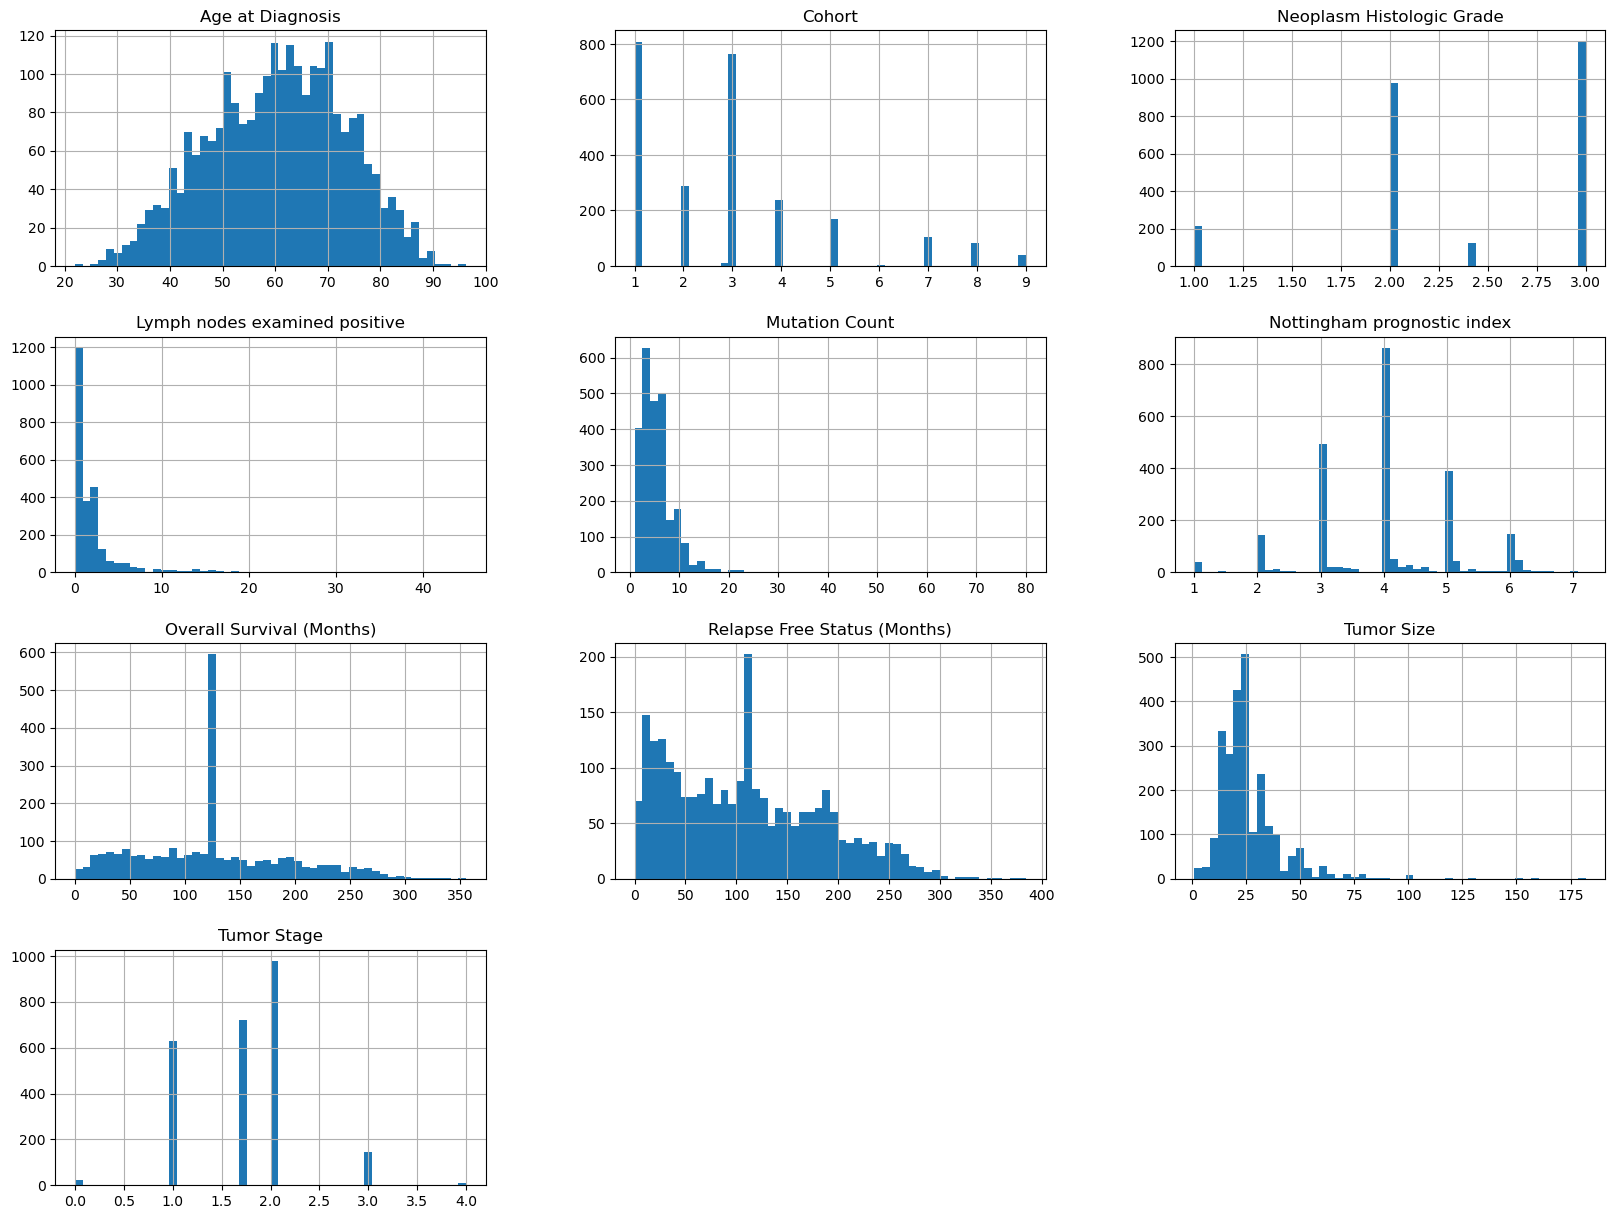

In [28]:
# Checking for the unique values in each numerical column
for col in num:
    unique_values_count = df[col].nunique()
    print(f"The number of unique values in {col} are: {unique_values_count}")

# Visualizing the distribution of numerical columns
plt.figure(figsize=(20, 15))
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [29]:
corr_matrix = df.corr(method='pearson', min_periods=1, numeric_only=True)

# Generate the heatmap using Plotly Express
fig = px.imshow(corr_matrix,
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                text_auto=True,
                aspect="auto",
                color_continuous_scale='reds',
                title='Correlation of the Attributes')

plt.savefig('correlation_matrix.png', dpi=300)
fig.show()

<Figure size 640x480 with 0 Axes>

Some of the feaatures are correlated, If the performance of the moel is bad, The correlated ones will be dropped. 

## Feature engineering

## Encoding the target variable

In [30]:
#Getting the data classes in the target variable
unique_classes = df['Patient Vital Status'].unique()
print("Unique classes in the target variable:")
for cls in unique_classes:
    print(cls)

Unique classes in the target variable:
Living
Died of Disease
Died of Other Causes


In [31]:
# Assigning the target variable to y
y= df['Patient Vital Status']

In [32]:
label_encoder = LabelEncoder()

# Assuming 'y' contains your target variable with class labels
# Fit the label encoder on the target variable
label_encoder.fit(y)

# Transform the target variable 'y' into encoded numeric values
y_encoded = label_encoder.transform(y)

# Print the mapping of original classes to encoded values
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:")
print(class_mapping)

# Example of encoding class labels
print("Encoded Classes:")
for label in label_encoder.classes_:
    print(f"{label}: {label_encoder.transform([label])[0]}")

Class Mapping:
{'Died of Disease': 0, 'Died of Other Causes': 1, 'Living': 2}
Encoded Classes:
Died of Disease: 0
Died of Other Causes: 1
Living: 2


In [33]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Check for any remaining missing values and handle them
df.fillna(df.mean(), inplace=True)  # Replace missing values with mean (for numerical columns)

In [34]:
df.tail()

Patient ID  Age at Diagnosis  Type of Breast Surgery  Cancer Type  \
2504        2504           70.0500                       1            0   
2505        2505           63.6000                       1            0   
2506        2506           60.4203                       1            0   
2507        2507           60.4203                       1            0   
2508        2508           60.4203                       1            0   

      Cancer Type Detailed  Cellularity  Chemotherapy  \
2504                     6            0             0   
2505                     6            0             0   
2506                     6            0             0   
2507                     6            0             0   
2508                     6            0             0   

      Pam50 + Claudin-low subtype   Cohort  ER status measured by IHC  ...  \
2504                            2  1.00000                          1  ...   
2505                            2  1.00000                          1  ...   
2506                            2  2.90032                          1  ...   
2507                            2  2.90032                          1  ...   
2508                            2  2.90032                          1  ...   

      Overall Survival Status  PR Status  Radio Therapy  \
2504                        0          1              1   
2505                        0          1              1   
2506                        0          1              1   
2507                        0          1              1   
2508                        0          1              1   

      Relapse Free Status (Months)  Relapse Free Status  Sex  \
2504                      4.930000                    1    0   
2505                     16.180000                    1    0   
2506                    108.842487                    0    0   
2507                    108.842487                    0    0   
2508                    108.842487                    0    0   

      3-Gene classifier subtype  Tumor Size  Tumor Stage  Patient Vital Status  
2504                          1   27.000000          1.0                     2  
2505                          1   28.000000          2.0                     2  
2506                          1   26.220093          0.0                     2  
2507                          1   26.220093          0.0                     2  
2508                          1   26.220093          0.0                     2  

[5 rows x 34 columns]

In [35]:
unique_classes = df['Patient Vital Status'].unique()
print("Unique classes in the target variable:")
for cls in unique_classes:
    print(cls)

Unique classes in the target variable:
2
0
1


Some further analysis will be done to prepare the data by removing some features that are less important. 

In [36]:
X = df.drop (columns=['Patient Vital Status'])

To get the feature impotance, the target is first droped. And the data frame is split into X and y

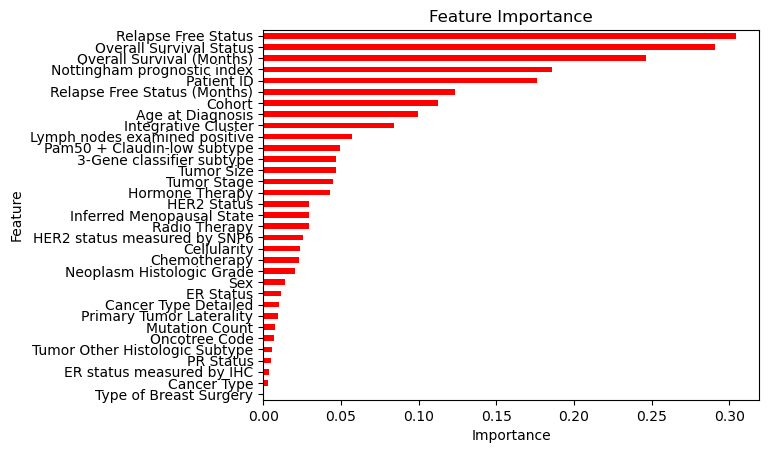

In [37]:
#feature selection


importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, index=X.columns)
# Plot feature importances
feat_importances.sort_values().plot(kind='barh', color='red')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

The average importance will be calculated and the features below the average will dropped

In [38]:
avg_importance = importances.mean()

# Print the average importance
print("Average Importance:", avg_importance)

Average Importance: 0.06569781288150109


In [39]:
avg_importance = feat_importances.mean()

# Identify features with importance scores below the average
low_importance_features = feat_importances[feat_importances < avg_importance].index.tolist()

# Drop features with importance scores below the average from the DataFrame
df = df.drop(columns=low_importance_features)

# Display the remaining selected features in the DataFrame
print("Selected Features:")
print(df.columns)

# Now df_selected contains the DataFrame with selected features
# You can use df_selected for further analysis or modeling

Selected Features:
Index(['Patient ID', 'Age at Diagnosis', 'Cohort', 'Integrative Cluster',
       'Nottingham prognostic index', 'Overall Survival (Months)',
       'Overall Survival Status', 'Relapse Free Status (Months)',
       'Relapse Free Status', 'Patient Vital Status'],
      dtype='object')


In [40]:
df.keys()


Index(['Patient ID', 'Age at Diagnosis', 'Cohort', 'Integrative Cluster',
       'Nottingham prognostic index', 'Overall Survival (Months)',
       'Overall Survival Status', 'Relapse Free Status (Months)',
       'Relapse Free Status', 'Patient Vital Status'],
      dtype='object')

## Data splitting


Just recalling the variables 

In [41]:
X = df.drop(columns=['Patient Vital Status'])
y = df['Patient Vital Status']

## Checking for imablance in the data

Living:  1366
Died of Disease:  646
Died of Other Causes:  497


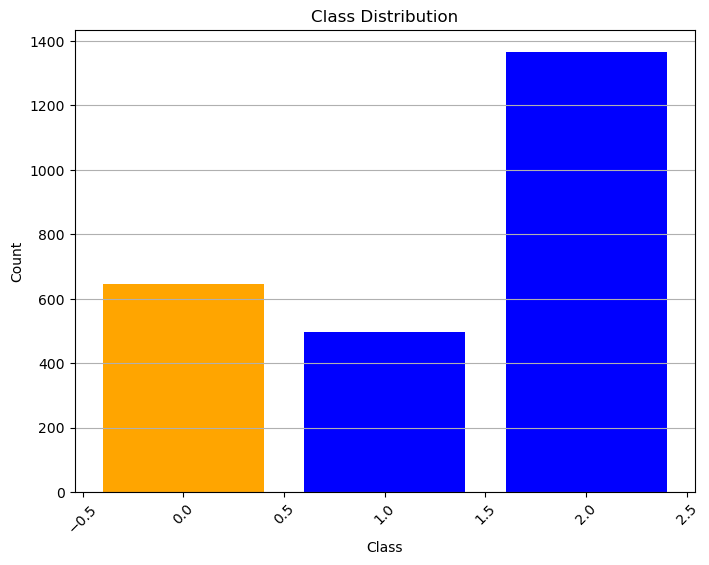

In [42]:
# Calculate the counts of each class in the target variable
counts = y.value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.grid(axis='y')





# Extract counts for each class
L_count = counts[2] 
D_count = counts[0]  
O_count = counts[1]  

print('Living: ', L_count)
print('Died of Disease: ', D_count)
print('Died of Other Causes: ', O_count)

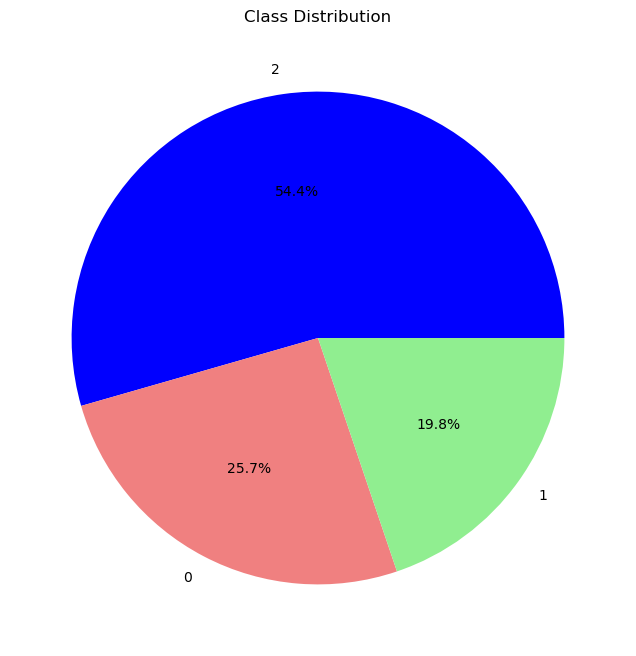

Living:  1366
Died of Disease:  646
Died of Other Causes:  497


In [43]:

counts = y.value_counts()

# Plotting the class distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=['blue', 'lightcoral', 'lightgreen'])
plt.title('Class Distribution')
plt.show()

# Extract counts for each class
L_count = counts[2]
D_count = counts[0]
O_count = counts[1]

print('Living: ', L_count)
print('Died of Disease: ', D_count)
print('Died of Other Causes: ', O_count)

The data classes are imbalanced. Some over sampling techniques will be applied to balance the data

## Data balancing using oversampling 

This technique will oversample the minority classes to match the size of the majority class

In [44]:
from collections import Counter
# Count the occurrences of each class in the original target variable
class_counts = Counter(y)

# Identify the majority class label
majority_class = max(class_counts, key=class_counts.get)

# Determine the desired count based on the majority class
desired_count = class_counts[majority_class]

# RandomOverSampler for balancing minority classes
ros = RandomOverSampler(sampling_strategy={0: desired_count, 1: desired_count})
X_over_resampled, y_oversampled = ros.fit_resample(X, y)

# SMOTE for further balancing
smote = SMOTE(sampling_strategy={0: desired_count, 1: desired_count})
X_resampled, y_resampled = smote.fit_resample(X_over_resampled, y_oversampled)

Living:  1366
Died of Disease:  1366
Died of Other Causes:  1366


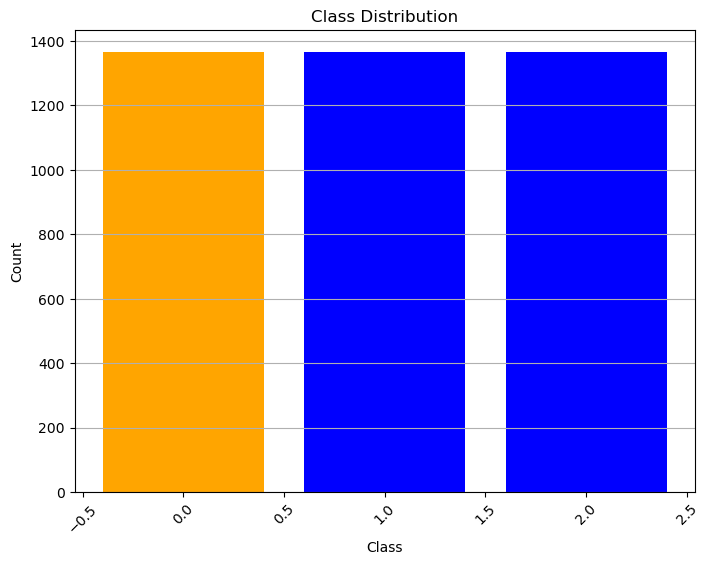

In [45]:
# Calculate the counts of each class in the target variable
counts = y_resampled.value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.bar(counts.index, counts.values, color=['blue', 'orange'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Extract counts for each class
L_count = counts[2]
D_count = counts[0]
O_count = counts[1]

print('Living: ', L_count)
print('Died of Disease: ', D_count)
print('Died of Other Causes: ', O_count)

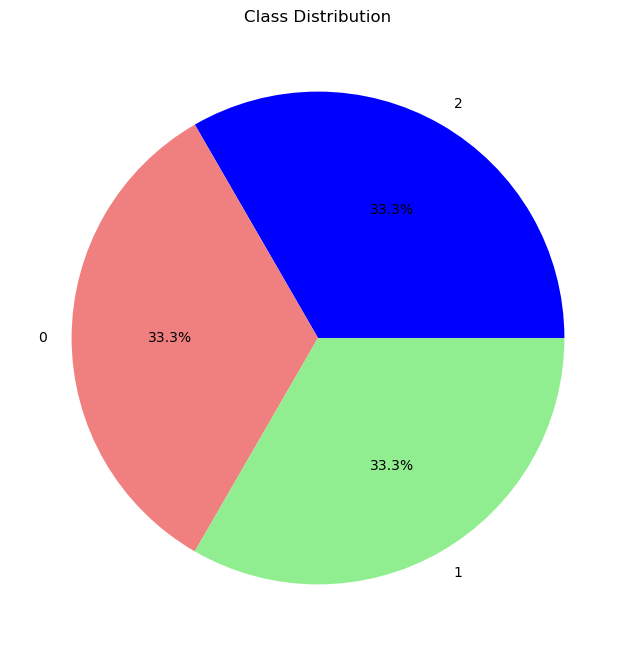

Living:  1366
Died of Disease:  1366
Died of Other Causes:  1366


In [46]:
counts = y_resampled.value_counts()

# Plotting the class distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', colors=['blue', 'lightcoral', 'lightgreen'])
plt.title('Class Distribution')
plt.show()

# Extract counts for each class
L_count = counts[2]
D_count = counts[0]
O_count = counts[1]

print('Living: ', L_count)
print('Died of Disease: ', D_count)
print('Died of Other Causes: ', O_count)

Now the data is balanced

## Splitting into train and test 

The data frame will be splitted into 80% for training and 20% for testing

In [47]:
X_train, X_test, y_train, y_test = train_test_split (X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3278, 9)
X_test shape: (820, 9)
y_train shape: (3278,)
y_test shape: (820,)


## Standardization

In [48]:
# Initialize a scaler (e.g., StandardScaler)
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform the training and testing data using the scaler
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Now X_train and X_test are the scaled versions of your data

## Model implementation

## Random forest

In [49]:
import time

# Initialize the Random Forest classifier
RandomForest = RandomForestClassifier(random_state = 42)

# Start measuring training time
rf_training_start_time = time.time()

# Fit the classifier to the training data
RandomForest.fit(X_train, y_train)

# End measuring training time
rf_training_end_time = time.time()
rf_training_time = rf_training_end_time - rf_training_start_time

# Start measuring prediction time
rf_prediction_start_time = time.time()

# Make predictions on the test data
rf_predictions = RandomForest.predict(X_test)

# End measuring prediction time
rf_prediction_end_time = time.time()
rf_prediction_time = rf_prediction_end_time - rf_prediction_start_time

# Calculate accuracy
RandomForest_score = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", RandomForest_score)

# Print training and prediction time
print("Random Forest Training Time (s):", rf_training_time)
print("Random Forest Prediction Time (s):", rf_prediction_time)

Random Forest Accuracy: 0.9975609756097561
Random Forest Training Time (s): 0.35707783699035645
Random Forest Prediction Time (s): 0.01795053482055664


In [50]:
cm = confusion_matrix(y_test, rf_predictions)
print(cm)

[[261   0   0]
 [  1 262   0]
 [  0   1 295]]


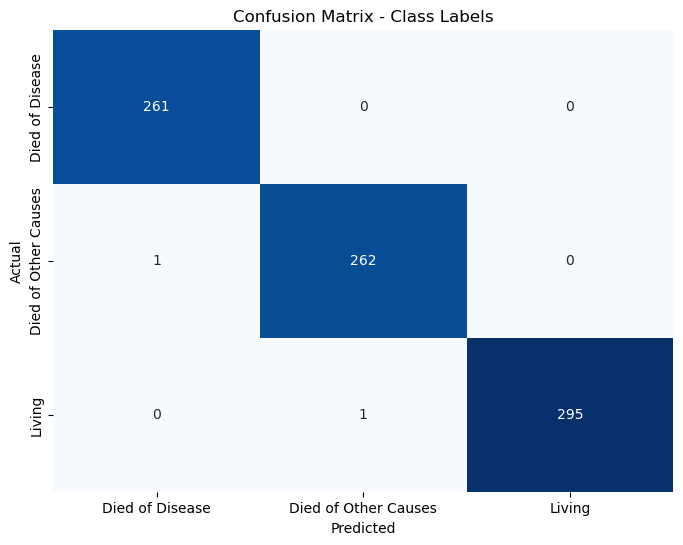

In [51]:
class_names = ['Died of Disease', 'Died of Other Causes', 'Living']

# Compute confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Class Labels')
plt.show()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,  RandomForest.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       261
           1       1.00      1.00      1.00       263
           2       1.00      1.00      1.00       296

    accuracy                           1.00       820
   macro avg       1.00      1.00      1.00       820
weighted avg       1.00      1.00      1.00       820



In [53]:
RandomForest.feature_importances_

array([0.16251266, 0.06656423, 0.02958061, 0.02122117, 0.02495728,
       0.08161393, 0.25932665, 0.05686851, 0.29735496])

In [54]:
df.shape

(2509, 10)

In [55]:
feature_importances = RandomForest.feature_importances_


feature_names = X_resampled.columns


df_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})


df_importances = df_importances.sort_values(by='importance', ascending=False)


print(df_importances)

                        feature  importance
8           Relapse Free Status    0.297355
6       Overall Survival Status    0.259327
0                    Patient ID    0.162513
5     Overall Survival (Months)    0.081614
1              Age at Diagnosis    0.066564
7  Relapse Free Status (Months)    0.056869
2                        Cohort    0.029581
4   Nottingham prognostic index    0.024957
3           Integrative Cluster    0.021221


Checking if the previous feature importance was correct

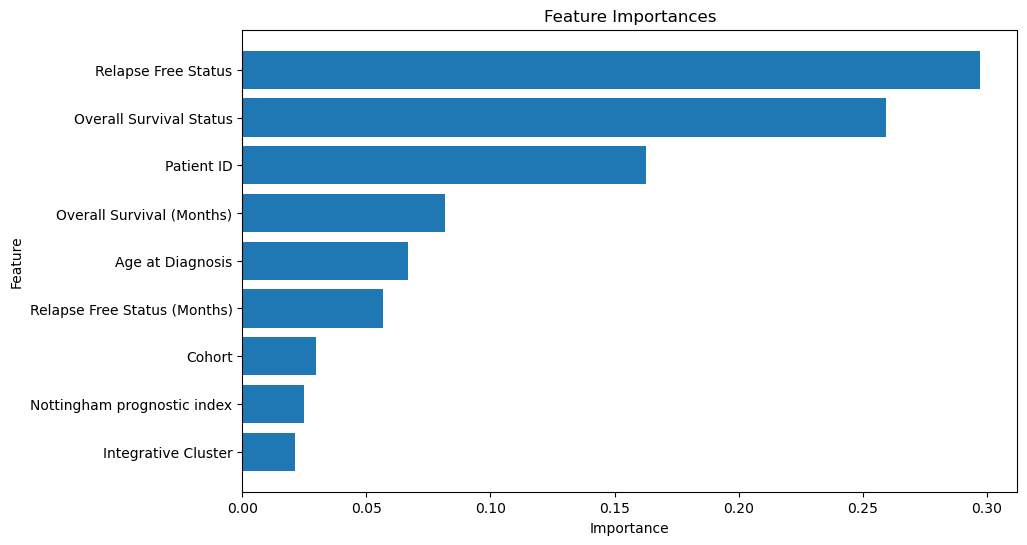

In [56]:
df_importances = df_importances.sort_values(by='importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(df_importances['feature'], df_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()

In [57]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],         
    'max_depth': [None, 10, 20],       
    'min_samples_split': [2, 5],        
    'min_samples_leaf': [1, 2]        
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForest, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator for prediction
best_estimator = grid_search.best_estimator_
predictions = best_estimator.predict(X_test)

# Evaluate accuracy
score = accuracy_score(y_test, predictions)
print("Test Accuracy:", score)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9902383168869857
Test Accuracy: 0.9975609756097561


In [58]:
# Define the number of folds for cross-validation
k = 5  

# Initialize the KFold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# List to store accuracy scores for each fold
acc_scores = []

# Initialize RandomForestClassifier
krf = RandomForestClassifier(max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state = 42)

# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    

    # Fit the RandomForestClassifier
    krf.fit(X_train, y_train)
    
    # Make predictions
    predictions = krf.predict(X_test)
    
    # Calculate accuracy score for the fold
    acc_score = accuracy_score(y_test, predictions)
    acc_scores.append(acc_score)

# Calculate the average accuracy score across all folds
avg_acc_score = sum(acc_scores) / len(acc_scores)

print("Accuracy scores for each fold:", acc_scores)
print("Average accuracy score:", avg_acc_score)

Accuracy scores for each fold: [0.9760956175298805, 0.9661354581673307, 0.9641434262948207, 0.9780876494023905, 0.9700598802395209]
Average accuracy score: 0.9709044063267888


In [59]:
import time

# Initialize the Random Forest classifier
rf = RandomForestClassifier(max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Start measuring training time
training_start_time = time.time()

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# End measuring training time
training_end_time = time.time()
training_time = training_end_time - training_start_time

# Start measuring prediction time
prediction_start_time = time.time()

# Make predictions on the test data
predictions = rf.predict(X_test)

# End measuring prediction time
prediction_end_time = time.time()
prediction_time = prediction_end_time - prediction_start_time

# Calculate accuracy
rf_score = accuracy_score(y_test, predictions)
print("Random Forest Accuracy:", rf_score)

# Print training and prediction time
print("Random Forest Training Time (s):", training_time)
print("Random Forest Prediction Time (s):", prediction_time)


Random Forest Accuracy: 0.9700598802395209
Random Forest Training Time (s): 0.47592735290527344
Random Forest Prediction Time (s): 0.027925729751586914


## Naive bayes

In [60]:
naive_bayes_classifier = GaussianNB()
T_start_time = time.time()

# Train the Naive Bayes classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

T_end_time = time.time()
nb_training_time = T_end_time - T_start_time

P_start_time = time.time()
# Make predictions on the testing data
nb_predictions = naive_bayes_classifier.predict(X_test)

P_end_time = time.time()
nb_prediction_time = P_end_time - P_start_time

# Calculate the accuracy of the model

naive_bayes_score = accuracy_score(y_test, nb_predictions)
# Convert accuracy to percentage

print("Training Time:", nb_training_time, "seconds")
print("Prediction Time:", nb_prediction_time, "seconds")
print("Accuracy:", naive_bayes_score)


Training Time: 0.00499725341796875 seconds
Prediction Time: 0.002009868621826172 seconds
Accuracy: 0.8542914171656687


In [61]:
k = 5  

# Initialize the KFold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=1)

# List to store accuracy scores for each fold
acc_scores = []

# Initialize the Naive Bayes classifier
knaive_bayes_classifier = GaussianNB()

# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the Naive Bayes classifier
    knaive_bayes_classifier.fit(X_train, y_train)
    
    # Make predictions
    predictions = knaive_bayes_classifier.predict(X_test)
    
    # Calculate accuracy score for the fold
    acc_score = accuracy_score(y_test, predictions)
    acc_scores.append(acc_score)

# Calculate the average accuracy score across all folds
avg_acc_score = sum(acc_scores) / len(acc_scores)

print("Accuracy scores for each fold:", acc_scores)
print("Average accuracy score:", avg_acc_score)

Accuracy scores for each fold: [0.8545816733067729, 0.8545816733067729, 0.8924302788844621, 0.848605577689243, 0.8682634730538922]
Average accuracy score: 0.8636925352482286


In [62]:
accuracy_percentage = naive_bayes_score * 100
nb_accuracy_percentage = "{:.2f}%".format(accuracy_percentage)
print("Naive bayes accuracy percentage is", nb_accuracy_percentage)

Naive bayes accuracy percentage is 85.43%


In [63]:
cm = confusion_matrix(y_test, nb_predictions)
print(cm)

[[ 49  41  47]
 [ 31  21  44]
 [ 85  63 120]]


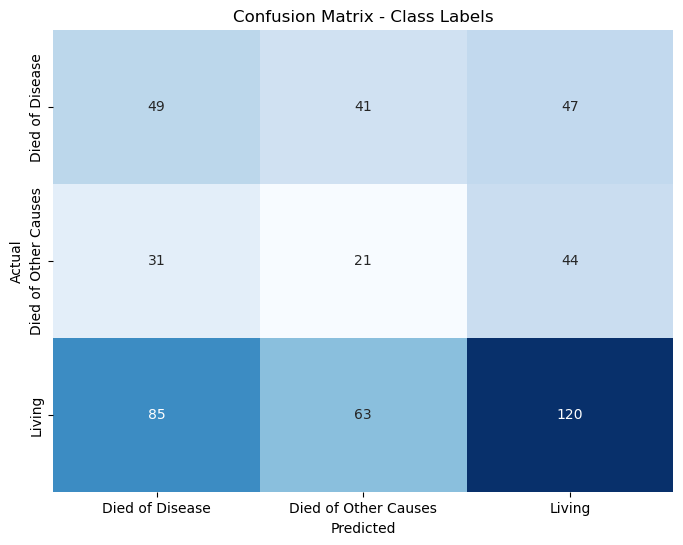

In [64]:
class_names = ['Died of Disease', 'Died of Other Causes', 'Living']

# Compute confusion matrix
cm = confusion_matrix(y_test, nb_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Class Labels')
plt.show()

In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test, naive_bayes_classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       137
           1       0.74      0.90      0.81        96
           2       1.00      0.81      0.89       268

    accuracy                           0.87       501
   macro avg       0.85      0.90      0.86       501
weighted avg       0.89      0.87      0.87       501



## Logistic regression

In [66]:
# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=1, max_iter=1000)

# Fit the classifier to the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
predictions = lr.predict(X_test)

# Calculate accuracy
LogisticRegression_score = accuracy_score(y_test, predictions)
print("Test Accuracy:", LogisticRegression_score)

Test Accuracy: 0.9461077844311377


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [67]:
# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=1, max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],                # Regularization parameter
    'solver': ['liblinear', 'lbfgs']
    # Optimization algorithm
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator for prediction
best_estimator = grid_search.best_estimator_
predictions = best_estimator.predict(X_test)

# Evaluate accuracy
score = accuracy_score(y_test, predictions)
print("Test Accuracy:", score)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Score: 0.911782732224166
Test Accuracy: 0.9660678642714571


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3278, 9)
X_test shape: (820, 9)
y_train shape: (3278,)
y_test shape: (820,)


In [69]:
k = 5  

# Initialize the KFold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=1)

# List to store accuracy scores for each fold
acc_scores = []

# Initialize the Logistic Regression classifier
lr = LogisticRegression(C=10, solver='liblinear', max_iter=1000, random_state=1)

# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the Logistic Regression classifier
    lr.fit(X_train, y_train)
    
    # Make predictions
    lr_predictions = lr.predict(X_test)
    
    # Calculate accuracy score for the fold
    acc_score = accuracy_score(y_test, lr_predictions)
    acc_scores.append(acc_score)

# Calculate the average accuracy score across all folds
avg_acc_score = sum(acc_scores) / len(acc_scores)

print("Accuracy scores for each fold:", acc_scores)
print("Average accuracy score:", avg_acc_score)

Accuracy scores for each fold: [0.952191235059761, 0.9601593625498008, 0.954183266932271, 0.954183266932271, 0.9660678642714571]
Average accuracy score: 0.9573569991491121


In [70]:
lr = LogisticRegression(C=10, solver='liblinear', max_iter=1000, random_state=1)

# Start measuring training time
training_start_time = time.time()

# Fit the classifier to the training data
lr.fit(X_train, y_train)

# End measuring training time
training_end_time = time.time()
lr_training_time = training_end_time - training_start_time

# Start measuring prediction time
prediction_start_time = time.time()

# Make predictions on the test data
predictions = lr.predict(X_test)

# End measuring prediction time
prediction_end_time = time.time()
lr_prediction_time = prediction_end_time - prediction_start_time

# Calculate accuracy
LogisticRegression_score = accuracy_score(y_test, predictions)
print("Test Accuracy:", LogisticRegression_score)

# Print training and prediction time
print("Training Time (s):", lr_training_time)
print("Prediction Time (s):", lr_prediction_time)

Test Accuracy: 0.9660678642714571
Training Time (s): 0.04889702796936035
Prediction Time (s): 0.0009944438934326172


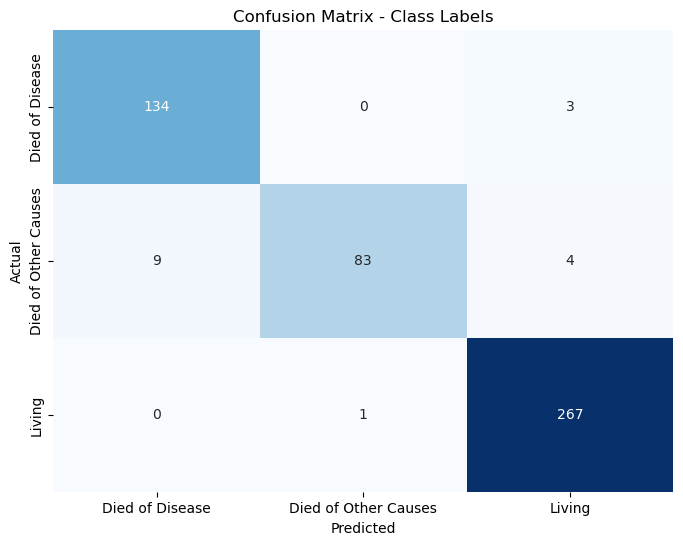

In [71]:
class_names = ['Died of Disease', 'Died of Other Causes', 'Living']

# Compute confusion matrix
cm = confusion_matrix(y_test, lr_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Class Labels')
plt.show()

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       137
           1       0.99      0.86      0.92        96
           2       0.97      1.00      0.99       268

    accuracy                           0.97       501
   macro avg       0.97      0.95      0.95       501
weighted avg       0.97      0.97      0.97       501



## Decision tree

In [73]:
dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

score = accuracy_score(y_test, predictions)
score

0.9500998003992016

In [74]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[119  18   0]
 [  5  89   2]
 [  0   0 268]]


In [75]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state = 1)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', verbose=1, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator for prediction
best_estimator = grid_search.best_estimator_
predictions = best_estimator.predict(X_test)

# Evaluate accuracy
score = accuracy_score(y_test, predictions)
print("Test Accuracy:", score)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.8354673018945175
Test Accuracy: 0.9600798403193613


In [76]:
# Define the number of folds (k)
k = 5

# Initialize the KFold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# List to store accuracy scores for each fold
acc_scores = []

# Iterate through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and fit the Decision Tree Classifier
    DecisionTree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2,random_state = 1)
    DecisionTree.fit(X_train, y_train)
    
    # Make predictions
    predictions = DecisionTree.predict(X_test)
    
    # Calculate accuracy score for the fold
    acc_score = accuracy_score(y_test, predictions)
    acc_scores.append(acc_score)

# Calculate the average accuracy score across all folds
avg_acc_score = sum(acc_scores) / len(acc_scores)

print("Accuracy scores for each fold:", acc_scores)
print("Average accuracy score:", avg_acc_score)

Accuracy scores for each fold: [0.9701195219123506, 0.9661354581673307, 0.9442231075697212, 0.9641434262948207, 0.9600798403193613]
Average accuracy score: 0.9609402708527168


In [77]:
DecisionTree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2, random_state = 42)
T_start_time = time.time()

DecisionTree.fit(X_train, y_train)

T_end_time = time.time()
dt_training_time = T_end_time - T_start_time


P_start_time = time.time()
dt_predictions = DecisionTree.predict(X_test)

P_end_time = time.time()
dt_prediction_time = P_end_time - P_start_time



DecisionTree_score = accuracy_score(y_test, dt_predictions)
print("Training Time:", dt_training_time, "seconds")
print("Prediction Time:", dt_prediction_time, "seconds")
print("Decision tree score is:", DecisionTree_score)

Training Time: 0.006979942321777344 seconds
Prediction Time: 0.0019960403442382812 seconds
Decision tree score is: 0.9580838323353293


In [78]:
cm = confusion_matrix(y_test, dt_predictions)
print(cm)

[[123   8   0]
 [ 10  92   2]
 [  0   1 265]]


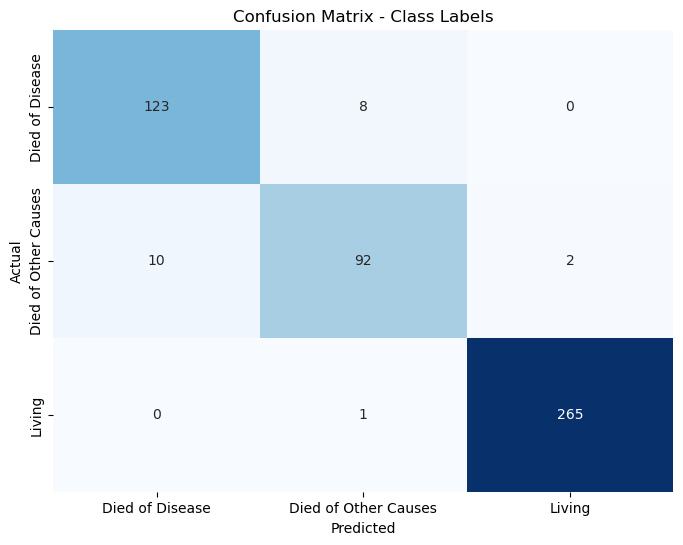

In [79]:
class_names = ['Died of Disease', 'Died of Other Causes', 'Living']

# Compute confusion matrix
cm = confusion_matrix(y_test, dt_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Class Labels')
plt.show()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, DecisionTree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       131
           1       0.91      0.88      0.90       104
           2       0.99      1.00      0.99       266

    accuracy                           0.96       501
   macro avg       0.94      0.94      0.94       501
weighted avg       0.96      0.96      0.96       501



In [81]:
tree_rules = export_text(DecisionTree, feature_names=list(X.columns))
print(tree_rules)

|--- Overall Survival Status <= 0.50
|   |--- Patient ID <= 1984.50
|   |   |--- Relapse Free Status <= 0.50
|   |   |   |--- Patient ID <= 413.50
|   |   |   |   |--- Relapse Free Status (Months) <= 179.59
|   |   |   |   |   |--- Relapse Free Status (Months) <= 26.00
|   |   |   |   |   |   |--- Relapse Free Status (Months) <= 19.59
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Relapse Free Status (Months) >  19.59
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Relapse Free Status (Months) >  26.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Relapse Free Status (Months) >  179.59
|   |   |   |   |   |--- class: 2
|   |   |   |--- Patient ID >  413.50
|   |   |   |   |--- class: 1
|   |   |--- Relapse Free Status >  0.50
|   |   |   |--- Overall Survival (Months) <= 61.63
|   |   |   |   |--- Patient ID <= 27.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Patient ID >  27.50
|   |   |   |   |   |--- Age at Diagnosi

## Model comparison

In [82]:
print("Decision Tree Accuracy:", DecisionTree_score)
print("Random Forest Accuracy:", RandomForest_score)
print("Naive bayes Accuracy:", naive_bayes_score)
print("Logistic Regression Accuracy:", LogisticRegression_score)


Decision Tree Accuracy: 0.9580838323353293
Random Forest Accuracy: 0.9975609756097561
Naive bayes Accuracy: 0.8542914171656687
Logistic Regression Accuracy: 0.9660678642714571


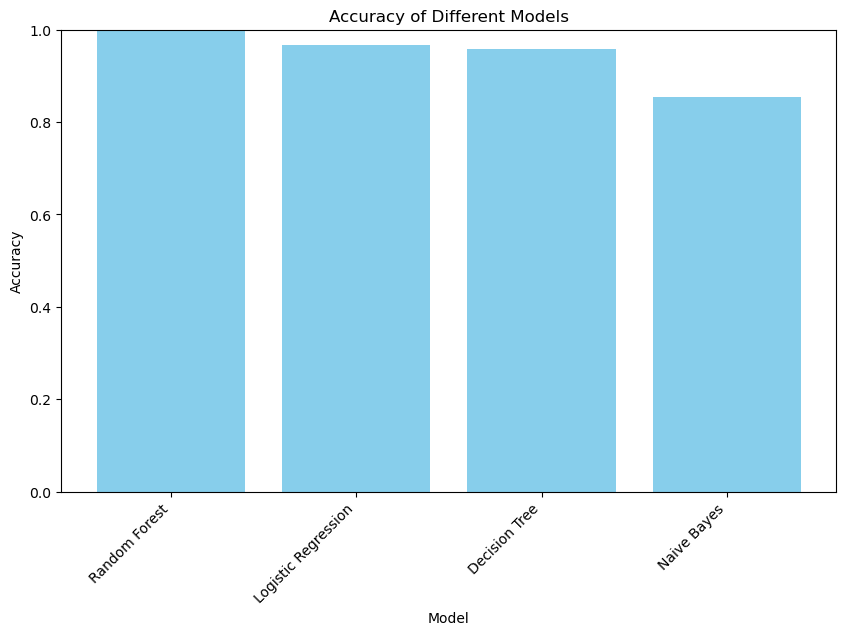

In [83]:
model_names = ['Decision Tree', 'Random Forest', 'Naive Bayes', 'Logistic Regression']
accuracies = [DecisionTree_score, RandomForest_score, naive_bayes_score, LogisticRegression_score]

# Sort the accuracies and corresponding model names
sorted_indices = sorted(range(len(accuracies)), key=lambda k: accuracies[k], reverse=True)
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_accuracies = [accuracies[i] for i in sorted_indices]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_model_names, sorted_accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1 for accuracy
plt.show()

In [84]:
accuracies = {
    'Decision Tree': DecisionTree_score,
    'Random Forest': RandomForest_score,
    'Naive Bayes': naive_bayes_score,
    'Logistic Regression': LogisticRegression_score
}

# Find the model with the highest accuracy
best_model = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model]

print("Best Model:", best_model)
print("Accuracy:", best_accuracy)

Best Model: Random Forest
Accuracy: 0.9975609756097561


In [85]:
# Print accuracy and runtime for each model
print("Decision Tree Accuracy:", DecisionTree_score)
print("Random Forest Accuracy:", RandomForest_score)
print("Naive Bayes Accuracy:", naive_bayes_score)
print("Logistic Regression Accuracy:", LogisticRegression_score)



accuracy_dict = {
     'Decision Tree': {'Accuracy': DecisionTree_score, 'Training Time': dt_training_time, 'Prediction Time': dt_prediction_time},
    'Random Forest': {'Accuracy': RandomForest_score, 'Training Time': rf_training_time, 'Prediction Time': rf_prediction_time},
    'Naive Bayes': {'Accuracy': naive_bayes_score, 'Training Time': nb_training_time, 'Prediction Time': nb_prediction_time},
    'Logistic Regression': {'Accuracy':LogisticRegression_score, 'Training Time': lr_training_time, 'Prediction Time': lr_prediction_time}
}

# Select the model with the highest accuracy
best_model = max(accuracy_dict, key=lambda x: accuracy_dict[x]['Accuracy'])

# Print the selected model and its metrics
print("\nSelected Model based on Accuracy:", best_model)
print("Accuracy:", accuracy_dict[best_model]['Accuracy'])
print("Training Time (s):", accuracy_dict[best_model]['Training Time'])
print("Prediction Time (s):", accuracy_dict[best_model]['Prediction Time'])


Decision Tree Accuracy: 0.9580838323353293
Random Forest Accuracy: 0.9975609756097561
Naive Bayes Accuracy: 0.8542914171656687
Logistic Regression Accuracy: 0.9660678642714571

Selected Model based on Accuracy: Random Forest
Accuracy: 0.9975609756097561
Training Time (s): 0.35707783699035645
Prediction Time (s): 0.01795053482055664


In [86]:
# Calculate the average accuracy
average_accuracy = (DecisionTree_score + RandomForest_score + naive_bayes_score + LogisticRegression_score) / 4

# Print the average accuracy
print(f"Average Accuracy: {average_accuracy:.4f}")

Average Accuracy: 0.9440


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


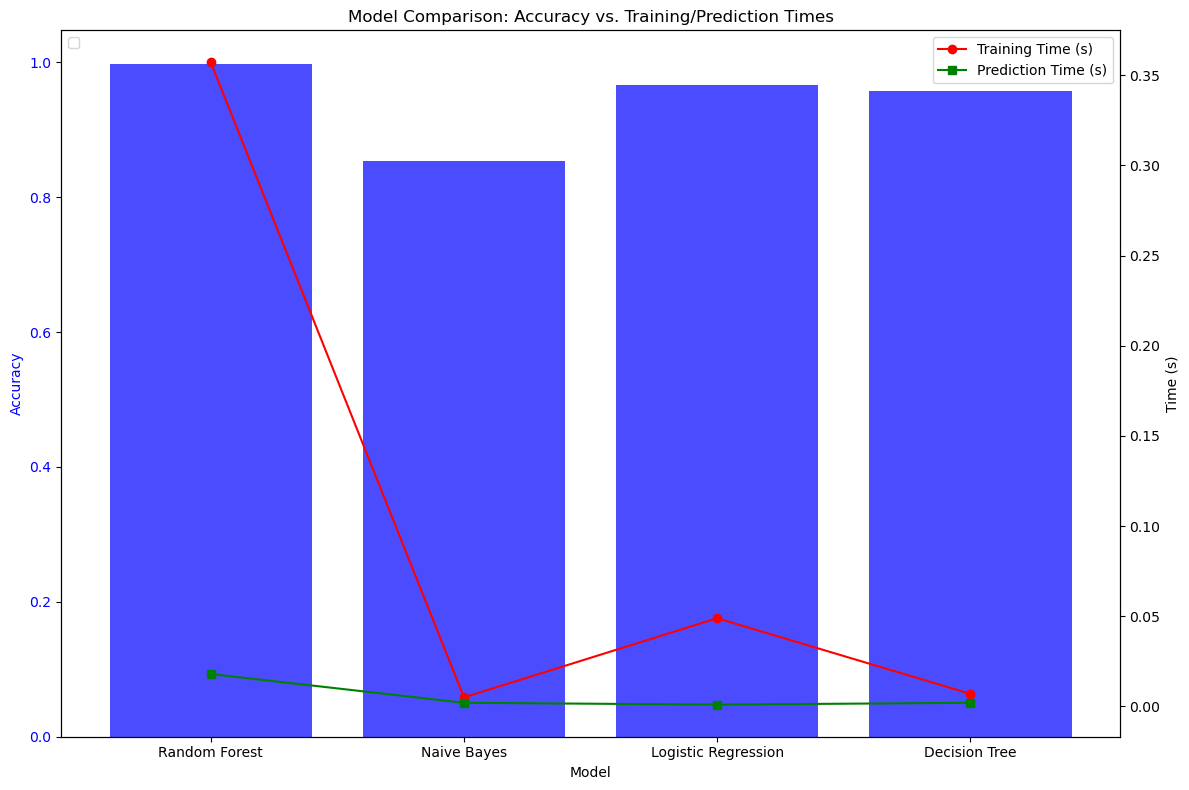

In [87]:
# Model names and corresponding metrics
model_names = [ "Random Forest", "Naive Bayes", "Logistic Regression","Decision Tree"]
accuracies = [ RandomForest_score, naive_bayes_score, LogisticRegression_score,DecisionTree_score]
training_times = [ rf_training_time, nb_training_time, lr_training_time,dt_training_time]
prediction_times = [ rf_prediction_time, nb_prediction_time, lr_prediction_time, dt_prediction_time]

# Plotting the bar chart
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting accuracy on the primary y-axis
ax1.bar(model_names, accuracies, color='b', alpha=0.7)
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a secondary y-axis for training and prediction times
ax2 = ax1.twinx()
ax2.plot(model_names, training_times, color='r', marker='o', label='Training Time (s)')
ax2.plot(model_names, prediction_times, color='g', marker='s', label='Prediction Time (s)')
ax2.set_ylabel('Time (s)', color='k')
ax2.tick_params(axis='y', labelcolor='k')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Title and show plot
plt.title('Model Comparison: Accuracy vs. Training/Prediction Times')
plt.tight_layout()
plt.show()

In [88]:
# Define the model metrics (accuracy, training time, prediction time) for each model
model_metrics = [
    ('Random Forest', RandomForest_score, rf_training_time, rf_prediction_time),
    ('Naive Bayes', naive_bayes_score, nb_training_time, nb_prediction_time),
    ('Logistic Regression', LogisticRegression_score, lr_training_time, lr_prediction_time),
    ('Decision tree', DecisionTree_score,dt_training_time,dt_prediction_time) 
]

# Sort models by accuracy (descending), training time (ascending), and prediction time (ascending)
sorted_models = sorted(model_metrics, key=lambda x: (-x[1], x[2], x[3]))

# Get the model names with the best accuracy, training time, and prediction time
best_model_names = [model[0] for model in sorted_models if model[1] == sorted_models[0][1]]

# Print the selected model names
print("Model with Best Accuracy")
for model_name in best_model_names:
    print(model_name)

Model with Best Accuracy
Random Forest


In [89]:
# Define the model names and their corresponding training and prediction times
model_names = ["Random Forest", "Naive Bayes", "Logistic Regression", "Decision tree"]
training_times = [rf_training_time, nb_training_time, lr_training_time,dt_training_time]
prediction_times = [rf_prediction_time, nb_prediction_time, lr_prediction_time,dt_prediction_time]

# Print the model names along with their training and prediction times
print("Model Performance:")
for name, train_time, pred_time in zip(model_names, training_times, prediction_times):
    print(f"Model: {name}")
    print(f"Training Time (s): {train_time:.4f}")
    print(f"Prediction Time (s): {pred_time:.4f}")
    print()  # Print an empty line for readability

Model Performance:
Model: Random Forest
Training Time (s): 0.3571
Prediction Time (s): 0.0180

Model: Naive Bayes
Training Time (s): 0.0050
Prediction Time (s): 0.0020

Model: Logistic Regression
Training Time (s): 0.0489
Prediction Time (s): 0.0010

Model: Decision tree
Training Time (s): 0.0070
Prediction Time (s): 0.0020



In [90]:
# Define the model names and their corresponding training and prediction times
model_names = ["Random Forest", "Naive Bayes", "Logistic Regression"]
training_times = [0.3201, 0.0030, 0.0439]  # Example training times
prediction_times = [0.0170, 0.0010, 0.0020]  # Example prediction times

# Find the model with the minimum training time
best_training_model_idx = training_times.index(min(training_times))
best_training_model_name = model_names[best_training_model_idx]
best_training_time = training_times[best_training_model_idx]

# Find the model with the minimum prediction time
best_prediction_model_idx = prediction_times.index(min(prediction_times))
best_prediction_model_name = model_names[best_prediction_model_idx]
best_prediction_time = prediction_times[best_prediction_model_idx]

# Print the model with the best training time
print(f"Model with the Best Training Time:")
print(f"Model: {best_training_model_name}")
print(f"Training Time (s): {best_training_time:.4f}")
print()

# Print the model with the best prediction time
print(f"Model with the Best Prediction Time:")
print(f"Model: {best_prediction_model_name}")
print(f"Prediction Time (s): {best_prediction_time:.4f}")


Model with the Best Training Time:
Model: Naive Bayes
Training Time (s): 0.0030

Model with the Best Prediction Time:
Model: Naive Bayes
Prediction Time (s): 0.0010


In [91]:
# Define the model metrics (accuracy, training time, prediction time) for each model
model_metrics = [
    ('Random Forest', RandomForest_score, rf_training_time, rf_prediction_time),
    ('Naive Bayes', naive_bayes_score, nb_training_time, nb_prediction_time),
    ('Logistic Regression', LogisticRegression_score, lr_training_time, lr_prediction_time),
    ('Decision tree', DecisionTree_score,dt_training_time,dt_prediction_time) 
    
]

# Sort models by accuracy (descending) and then by training time (ascending)
sorted_models = sorted(model_metrics, key=lambda x: (-x[1], x[2]))

# Select the model with the best balance of accuracy and runtime
best_model_name, best_accuracy, best_training_time, best_prediction_time = sorted_models[0]

# Print the selected model and its metrics
print("Selected Model based on Accuracy", best_model_name)
print("Accuracy:", best_accuracy)
print("Training Time (s):", best_training_time)
print("Prediction Time (s):", best_prediction_time)

Selected Model based on Accuracy Random Forest
Accuracy: 0.9975609756097561
Training Time (s): 0.35707783699035645
Prediction Time (s): 0.01795053482055664
